In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
titanic = pd.read_csv("titanic.csv",encoding="ISO-8859-1")
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [7]:
titanic.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [8]:
#filling missing Age values 
titanic["age"].fillna(titanic["age"].median(),inplace=True)
titanic["age"].isnull().sum()

0

In [9]:
#fiiling missing embarked values 
titanic["embarked"].value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [10]:
#the most embarked is S so we'll fill them with s
titanic["embarked"].fillna("S",inplace=True)
titanic["embarked"].isnull().sum()

0

In [11]:
titanic["cabin"].isnull().sum()

1015

In [12]:
#cabin has soo many missing values so we'll just get rid of it

In [13]:
titanic.drop('cabin', axis=1, inplace=True)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [14]:
titanic.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age             0
sibsp           1
parch           1
ticket          1
fare            2
embarked        0
boat          824
body         1189
home.dest     565
dtype: int64

In [15]:
titanic["survived"].value_counts()

0.0    809
1.0    500
Name: survived, dtype: int64

In [16]:
#since most haven't survived and we have only one missing value , we'll assume it is dead
titanic.survived.fillna(0.0,inplace=True)
titanic.survived.isnull().sum()

0

titanic.name.isnull()

In [17]:
titanic["sex"].value_counts()

male      843
female    466
Name: sex, dtype: int64

In [18]:
#since male is the most and we have only one missing value so we'll assume it is male
titanic.sex.fillna("male",inplace=True)


In [19]:
titanic.sibsp.value_counts()

0.0    891
1.0    319
2.0     42
4.0     22
3.0     20
8.0      9
5.0      6
Name: sibsp, dtype: int64

In [20]:
titanic.sibsp.fillna((titanic["sibsp"].median()),inplace=True)


In [21]:
titanic.pclass.value_counts()

3.0    709
1.0    323
2.0    277
Name: pclass, dtype: int64

In [22]:
titanic.pclass.fillna((titanic["pclass"].median()),inplace=True)

In [23]:
titanic.parch.fillna((titanic["parch"].median()),inplace=True)

In [24]:
#we have only one ticket missing so we'll assume it is the most repeated one 
K=titanic["ticket"].mode()
K

0    CA. 2343
dtype: object

In [25]:
titanic.ticket.fillna("CA. 2343",inplace=True)
titanic.ticket.isnull().sum()

0

In [26]:
titanic.fare.fillna((titanic["fare"].mean()),inplace=True)

In [27]:
titanic.drop("boat",axis=1,inplace=True)
titanic.drop("body",axis=1,inplace=True)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"


In [28]:
L=titanic["home.dest"].mode()

L

0    New York, NY
dtype: object

In [29]:
titanic["home.dest"].fillna("New York, NY",inplace=True)

In [30]:
titanic["home.dest"].isnull().sum()

0

In [31]:
titanic.isnull().sum()

pclass       0
survived     0
name         1
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
embarked     0
home.dest    0
dtype: int64

In [32]:
titanic.dropna(axis=0,how='any',inplace=True)
titanic.isnull().sum()

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
embarked     0
home.dest    0
dtype: int64

In [33]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
titanic["sex"]=encoder.fit_transform(titanic["sex"])
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",0,29.0000,0.0,0.0,24160,211.3375,S,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",1,0.9167,1.0,2.0,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",0,2.0000,1.0,2.0,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1.0,2.0,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1.0,2.0,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"


In [34]:
encoder=LabelEncoder()
titanic["embarked"]=encoder.fit_transform(titanic["embarked"])
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",0,29.0000,0.0,0.0,24160,211.3375,2,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",1,0.9167,1.0,2.0,113781,151.5500,2,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",0,2.0000,1.0,2.0,113781,151.5500,2,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1.0,2.0,113781,151.5500,2,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1.0,2.0,113781,151.5500,2,"Montreal, PQ / Chesterville, ON"


In [35]:
#

In [36]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   int32  
 4   age        1309 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1309 non-null   float64
 9   embarked   1309 non-null   int32  
 10  home.dest  1309 non-null   object 
dtypes: float64(6), int32(2), object(3)
memory usage: 97.2+ KB


In [37]:
titanic.describe()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,0.644003,29.503183,0.498854,0.385027,33.295479,1.493506
std,0.837836,0.486055,0.478997,12.905246,1.041658,0.865560,51.738879,0.814244
min,1.000000,0.000000,0.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000
50%,3.000000,0.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,3.000000,1.000000,1.000000,35.000000,1.000000,0.000000,31.275000,2.000000
max,3.000000,1.000000,1.000000,80.000000,8.000000,9.000000,512.329200,2.000000


Text(0.5, 1.0, 'age histogram')

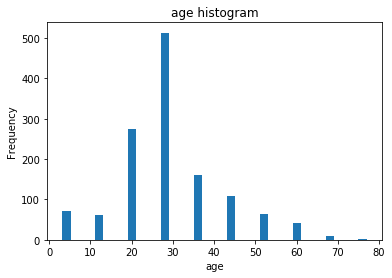

In [38]:
plt.hist(titanic["age"],bins=10,rwidth=0.25,)

plt.xlabel("age")
plt.ylabel("Frequency")
plt.title("age histogram")

Text(0.5, 1.0, 'Fare histogram')

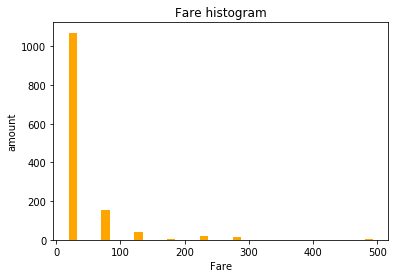

In [39]:
plt.hist(titanic["fare"],bins=10,rwidth=0.25,color="orange")
plt.xlabel("Fare")
plt.ylabel("amount")
plt.title("Fare histogram")

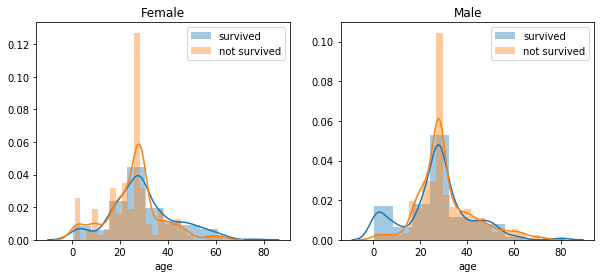

In [40]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = titanic[titanic['sex']==0]
men = titanic[titanic['sex']==1]
ax = sns.distplot(women[women['survived']==1].age.dropna(), bins=10, label = survived, ax = axes[0], kde =True)
ax = sns.distplot(women[women['survived']==0].age.dropna(), bins=25, label = not_survived, ax = axes[0], kde =True)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['survived']==1].age.dropna(), bins=10, label = survived, ax = axes[1], kde = True)
ax = sns.distplot(men[men['survived']==0].age.dropna(), bins=25, label = not_survived, ax = axes[1], kde =True)
ax.legend()
_ = ax.set_title('Male')

In [41]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
0,0.727468
1,0.190985


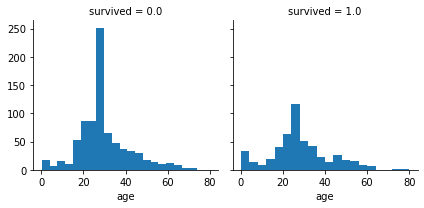

In [42]:
g = sns.FacetGrid(titanic, col='survived')
g.map(plt.hist, 'age', bins=20)

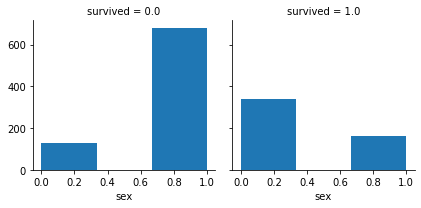

In [43]:
g = sns.FacetGrid(titanic, col='survived')
g.map(plt.hist, 'sex', bins=3)

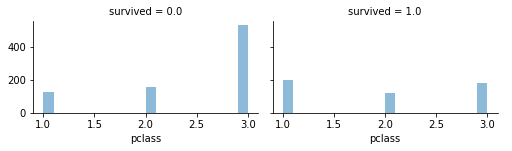

In [44]:
grid = sns.FacetGrid(titanic, col='survived', height=2.2, aspect=1.6)
grid.map(plt.hist, 'pclass', alpha=.5, bins=20)
grid.add_legend()

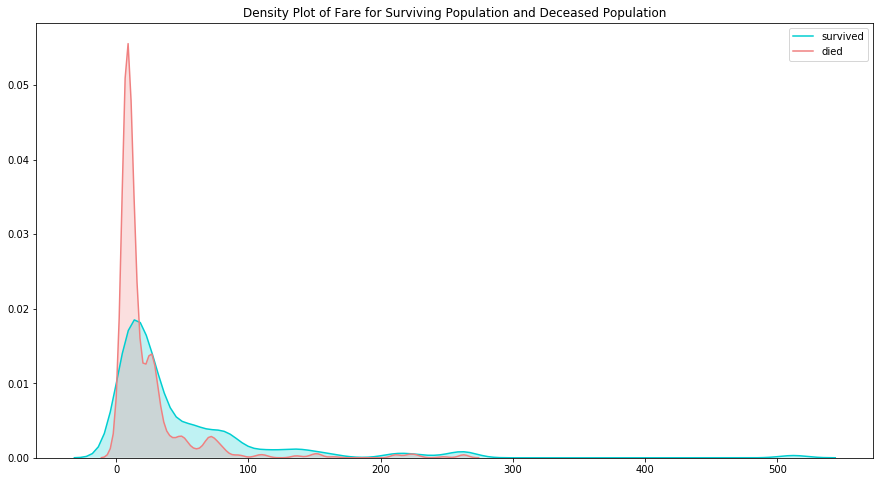

In [45]:
plt.figure(figsize=(15,8))
sns.kdeplot(titanic["fare"][titanic.survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(titanic["fare"][titanic.survived == 0], color="lightcoral", shade=True)
plt.legend(['survived', 'died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
plt.show()

In [46]:
#relation between pclass and survived using groupby 
titanic.groupby('pclass')[['survived']].mean()

,survived
pclass,
1.0,0.619195
2.0,0.429603
3.0,0.255289


In [47]:
newest_titanic=titanic.drop(["name","ticket","home.dest"],axis=1)

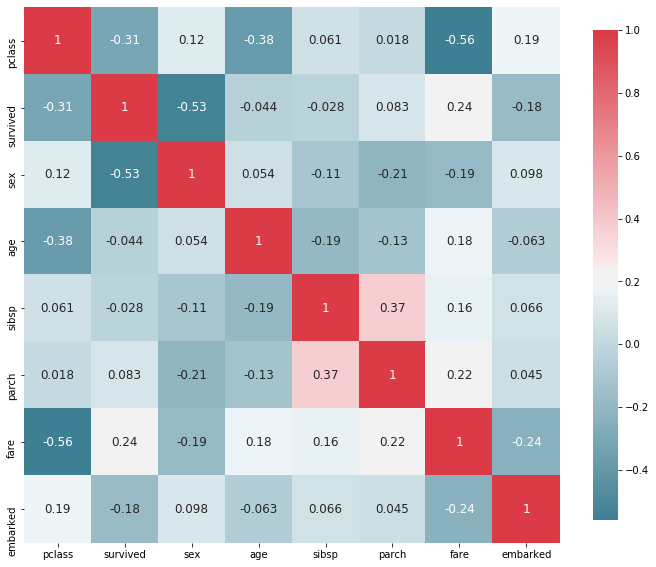

In [48]:

def plot_correlation_map( titanic ):

    corr = newest_titanic.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap( corr,  cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 },  ax=ax, annot = True, annot_kws = { 'fontsize' : 12 } )
plot_correlation_map("titanic")

In [49]:
# heatmap analysis
#the function created a heatmapwhich visualizes covariance matrix between features , hence observing the relation between them 
#diagonally we always have 1 since the covariance matrix of a variable by itself is 1 
#each cell takes a color depending on its value n the color palette 
#when the covariance matrix is 0 , it means that the feature is useless .in this case PassengerID is so close to 0 (0.005)which means it is not important 
# All the other features are useful because they are greater than 0 
#Sex is the most important feauture (dark shade color and great value which is -0.55)
#chances of survival are high for female , young, at first class 

In [50]:
#

In [51]:
new_titanic=titanic.drop(["name","ticket","fare","home.dest"],axis=1)
new_titanic.head()


,pclass,survived,sex,age,sibsp,parch,embarked
0,1.0,1.0,0,29.0000,0.0,0.0,2
1,1.0,1.0,1,0.9167,1.0,2.0,2
2,1.0,0.0,0,2.0000,1.0,2.0,2
3,1.0,0.0,1,30.0000,1.0,2.0,2
4,1.0,0.0,0,25.0000,1.0,2.0,2


In [52]:
#extracted some names to see the position of title :last name+,+title+.+actual name
titanic['name'].unique()[:10]

array(['Allen, Miss. Elisabeth Walton', 'Allison, Master. Hudson Trevor',
       'Allison, Miss. Helen Loraine',
       'Allison, Mr. Hudson Joshua Creighton',
       'Allison, Mrs. Hudson J C (Bessie Waldo Daniels)',
       'Anderson, Mr. Harry', 'Andrews, Miss. Kornelia Theodosia',
       'Andrews, Mr. Thomas Jr',
       'Appleton, Mrs. Edward Dale (Charlotte Lamson)',
       'Artagaveytia, Mr. Ramon'], dtype=object)

In [53]:

import re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return
titanic["Title"] = titanic["name"].apply(get_title)


In [57]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest,Title
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",0,29.0000,0.0,0.0,24160,211.3375,2,"St Louis, MO",Miss
1,1.0,1.0,"Allison, Master. Hudson Trevor",1,0.9167,1.0,2.0,113781,151.5500,2,"Montreal, PQ / Chesterville, ON",Master
2,1.0,0.0,"Allison, Miss. Helen Loraine",0,2.0000,1.0,2.0,113781,151.5500,2,"Montreal, PQ / Chesterville, ON",Miss
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1.0,2.0,113781,151.5500,2,"Montreal, PQ / Chesterville, ON",Mr
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1.0,2.0,113781,151.5500,2,"Montreal, PQ / Chesterville, ON",Mrs


In [58]:
titanic.Title.value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Major         2
Mlle          2
Ms            2
Dona          1
Lady          1
Jonkheer      1
Don           1
Capt          1
Mme           1
Sir           1
Countess      1
Name: Title, dtype: int64

In [59]:
titanic.Title.fillna("Miss",inplace=True)
titanic.Title.isnull().sum()

0

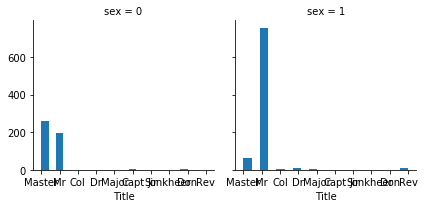

In [60]:
g = sns.FacetGrid(titanic, col='sex')
g.map(plt.hist, 'Title', bins=20)
grid.add_legend()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text xticklabel objects>)

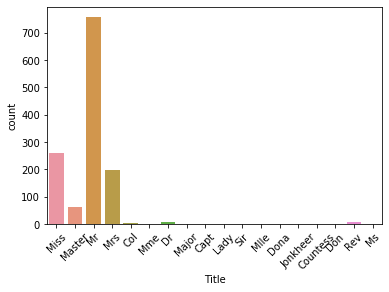

In [61]:
sns.countplot(x="Title",data=titanic)
plt.xticks(rotation=45)

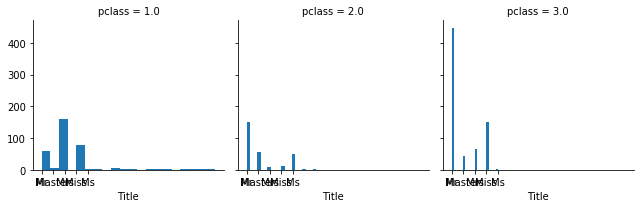

In [62]:
g = sns.FacetGrid(titanic, col='pclass')
g.map(plt.hist, 'Title', bins=20)
grid.add_legend()


In [63]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }
titanic["Title"]=titanic["Title"].map(Title_Dictionary)
titanic["Title"].isnull().sum()    



1

In [64]:
titanic["Title"].value_counts()

Mrs        956
Miss       263
Master      61
Officer     23
Royalty      5
Name: Title, dtype: int64

In [65]:
titanic["Title"].mode()

0    Mrs
dtype: object

In [66]:
titanic.Title.fillna("Mrs",inplace=True)
titanic["Title"].isnull().sum() 

0

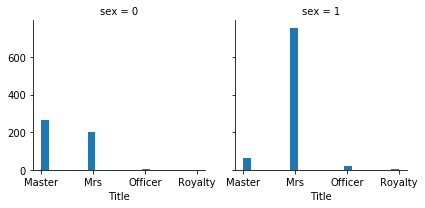

In [67]:
g = sns.FacetGrid(titanic, col='sex')
g.map(plt.hist, 'Title', bins=20)
grid.add_legend()

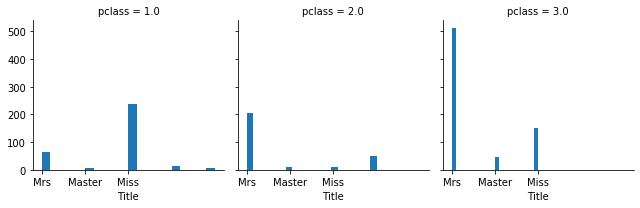

In [68]:
g = sns.FacetGrid(titanic, col='pclass')
g.map(plt.hist, 'Title', bins=20)
grid.add_legend()

In [69]:
for values in titanic:
    titanic['FamilySize'] = titanic['sibsp'] + titanic['parch'] + 1
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest,Title,FamilySize
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",0,29.0000,0.0,0.0,24160,211.3375,2,"St Louis, MO",Miss,1.0
1,1.0,1.0,"Allison, Master. Hudson Trevor",1,0.9167,1.0,2.0,113781,151.5500,2,"Montreal, PQ / Chesterville, ON",Master,4.0
2,1.0,0.0,"Allison, Miss. Helen Loraine",0,2.0000,1.0,2.0,113781,151.5500,2,"Montreal, PQ / Chesterville, ON",Miss,4.0
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1.0,2.0,113781,151.5500,2,"Montreal, PQ / Chesterville, ON",Mrs,4.0
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1.0,2.0,113781,151.5500,2,"Montreal, PQ / Chesterville, ON",Mrs,4.0


In [70]:

#

In [71]:
#

In [72]:
titanic.groupby('FamilySize')[['survived']].mean()

,survived
FamilySize,
1.0,0.302532
2.0,0.536170
3.0,0.566038
4.0,0.697674
5.0,0.272727
6.0,0.200000
7.0,0.250000
8.0,0.000000
11.0,0.000000


In [73]:
# this feauture is useful
#in fact , it is better to have a family of 4 an less 
#because it is much easier to find 3 places in a life boat  for example than to find 8 places  
#which means this feature helps predict if the individual will survive or not